In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import numpy.linalg as la
import numpy.random as rand

In [2]:
G = const.G #gravitational constant
data = np.loadtxt('gravdata.txt')
x = data[:,0]*1e3 # x coordinate
xs = x**2
d = data[:,1] # data
#initial guess
m0 = np.array([ 100., 400, 800, 500, 50, 3000, 2000, 6000, 9000, 10000])

In [8]:
def f_forward(m0):
    """Data predicted given the model parameters"""
    d0 = G*m0[0]*np.log( (xs+m0[5]**2)/xs)
    for i in np.arange(1,5):
        d0 += G*m0[i]*np.log( (xs+np.cumsum(m0[5:6+i])[-1]**2)/ (xs+np.cumsum(m0[5:i+5])[-1]**2) )
    return d0

def f_misfit(m0):
    c = 1e-18*2
    K  = 1
    g = f_forward(m0)
    return -np.log(K*np.exp(-la.norm(d-g)**2/c))
def plot_dens(m, m0 = np.empty(1)):
    dz = m[5:]
    z_base = np.cumsum(dz)
    z_top = np.insert(z_base,0, values = 0)[:-1]
    fig, ax = plt.subplots(figsize = (18,6))
    ax.set_xlabel('depth in m')
    ax.set_ylabel('density in kg/m^3')
    ax.axes.bar(x = (z_top+z_base)/2,height = m[:5], width = dz, alpha = 0.5, label = 'final')
    if len(m0)>1:
        dz0 = m0[5:]
        z_base0 = np.cumsum(dz0)
        z_top0 = np.insert(z_base0,0, values = 0)[:-1]
        ax.axes.bar(x = (z_top0+z_base0)/2,height = m[:5], width = dz, label ='start', alpha =.5)
    ax.legend()
    plt.show()

def plot_pred(m,m0=np.empty(1)):
    pred = f_forward(m)
    fig,ax = plt.subplots()
    ax.plot(x, pred, label = 'prediction')
    ax.plot(x, d, label = 'data')
    ax.set_xlabel('horizontal position')
    ax.set_ylabel('gravity')
    if len(m0)>1:
        ax.plot(x,f_forward(m0), label ='prediction m0')
    ax.legend()
    plt.show()

In [9]:
num_it = 5000
m = m0
for i in range(num_it):
    S = f_misfit(m)
    m_ind = rand.randint(0,len(m0))
    if m_ind<5:
        rand_num = rand.uniform(-5,5)
    else: rand_num = rand.uniform(-50,50)
    m_p = np.copy(m)
    if (m_p[m_ind]+rand_num)>0:
        m_p[m_ind] = m_p[m_ind] + rand_num
    else: m_p = m
    S_p = f_misfit(m_p)
    if S_p<=S:
        m = m_p
    else:
        p = np.exp(S-S_p)
        prob = rand.uniform(0,1)
        if p>prob:
            m = m_p
        else:
            m = m

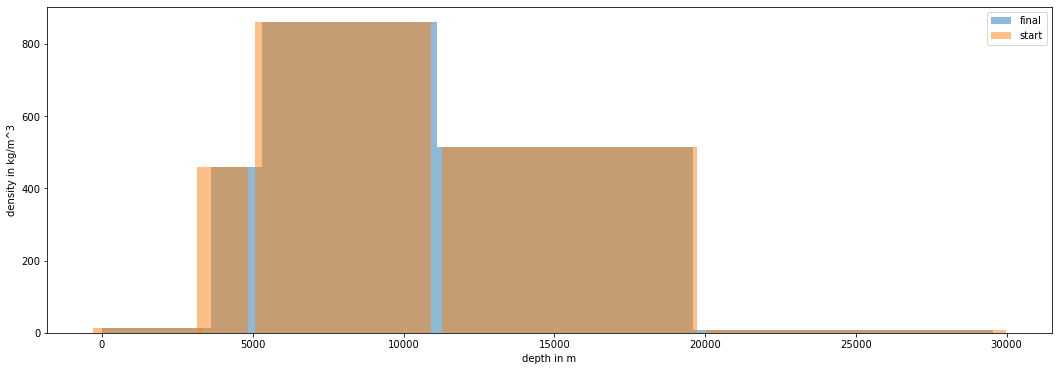

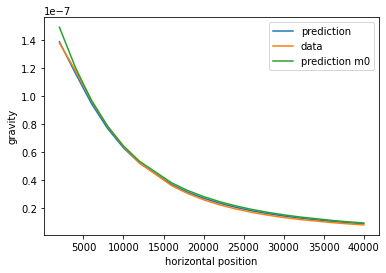

In [10]:
plot_dens(m,m0)
plot_pred(m,m0)